# Task 1: Data Retrieving 

In [1]:
import numpy as np
import pandas as pd
bank = 'bank.csv'
bank = pd.read_csv(bank, sep = ';')

In [2]:
bank.shape

(4521, 17)

In [3]:
bank.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
# Choosing what we want - drop rows where education & job are unknowns 
bank1 = bank.loc[(bank.education == 'unknown') & (bank.job == 'unknown')]
bank1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
178,37,unknown,married,unknown,no,1699,no,no,unknown,9,jun,63,1,-1,0,unknown,no
641,56,unknown,married,unknown,no,0,no,no,unknown,20,jun,471,2,-1,0,unknown,no
1218,54,unknown,married,unknown,no,2508,no,no,unknown,20,jun,34,8,-1,0,unknown,no
1266,54,unknown,married,unknown,no,895,no,no,cellular,7,oct,335,1,-1,0,unknown,yes
1441,49,unknown,married,unknown,no,301,no,no,cellular,14,aug,789,2,-1,0,unknown,no
1517,53,unknown,married,unknown,no,13,no,no,telephone,28,jan,69,1,-1,0,unknown,no
1569,43,unknown,single,unknown,no,181,no,no,telephone,28,jan,41,1,-1,0,unknown,no
1681,65,unknown,married,unknown,no,300,no,no,cellular,12,jan,105,1,-1,0,unknown,no
2081,48,unknown,married,unknown,no,286,no,no,cellular,30,jul,166,2,-1,0,unknown,no
2351,52,unknown,married,unknown,no,1317,no,no,unknown,12,jun,58,1,-1,0,unknown,no


In [5]:
# Drop rows where education & job are both unknowns 
bank = bank.drop([178, 641, 1218, 1266, 1441, 1517, 1569, 1681, 2081, 2351, 2486, 2711, 3963, 4137, 4225])

In [6]:
bank.shape

(4506, 17)

In [7]:
# Replace unknowns to others (job and education)
bank[['job','education']] =  bank[['job','education']].replace(['unknown'], 'others')

In [8]:
bank['education'].value_counts()

secondary    2306
tertiary     1350
primary       678
others        172
Name: education, dtype: int64

In [9]:
bank['job'] = bank['job'].str.replace('admin.', 'admin')
bank['job'].value_counts()

management       969
blue-collar      946
technician       768
admin            478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
others            23
Name: job, dtype: int64

In [10]:
bank['contact'] =  bank['contact'].replace(['unknown'], 'cellular')
bank['contact'].value_counts()

cellular     4208
telephone     298
Name: contact, dtype: int64

# Task 2: Data Exploration 

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

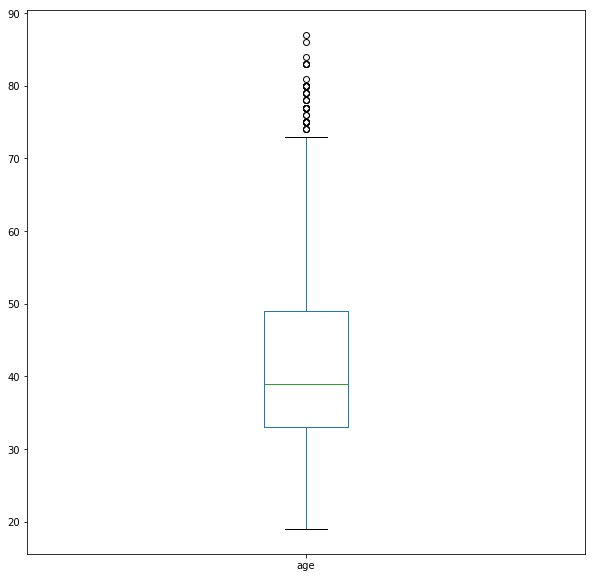

In [12]:
# STATS DESCRIPTION/ GRAPH 1: AGE 
bank['age'].plot(kind='box',figsize = (10,10))
plt.show()

Text(0.5,1,'Job Distribution')

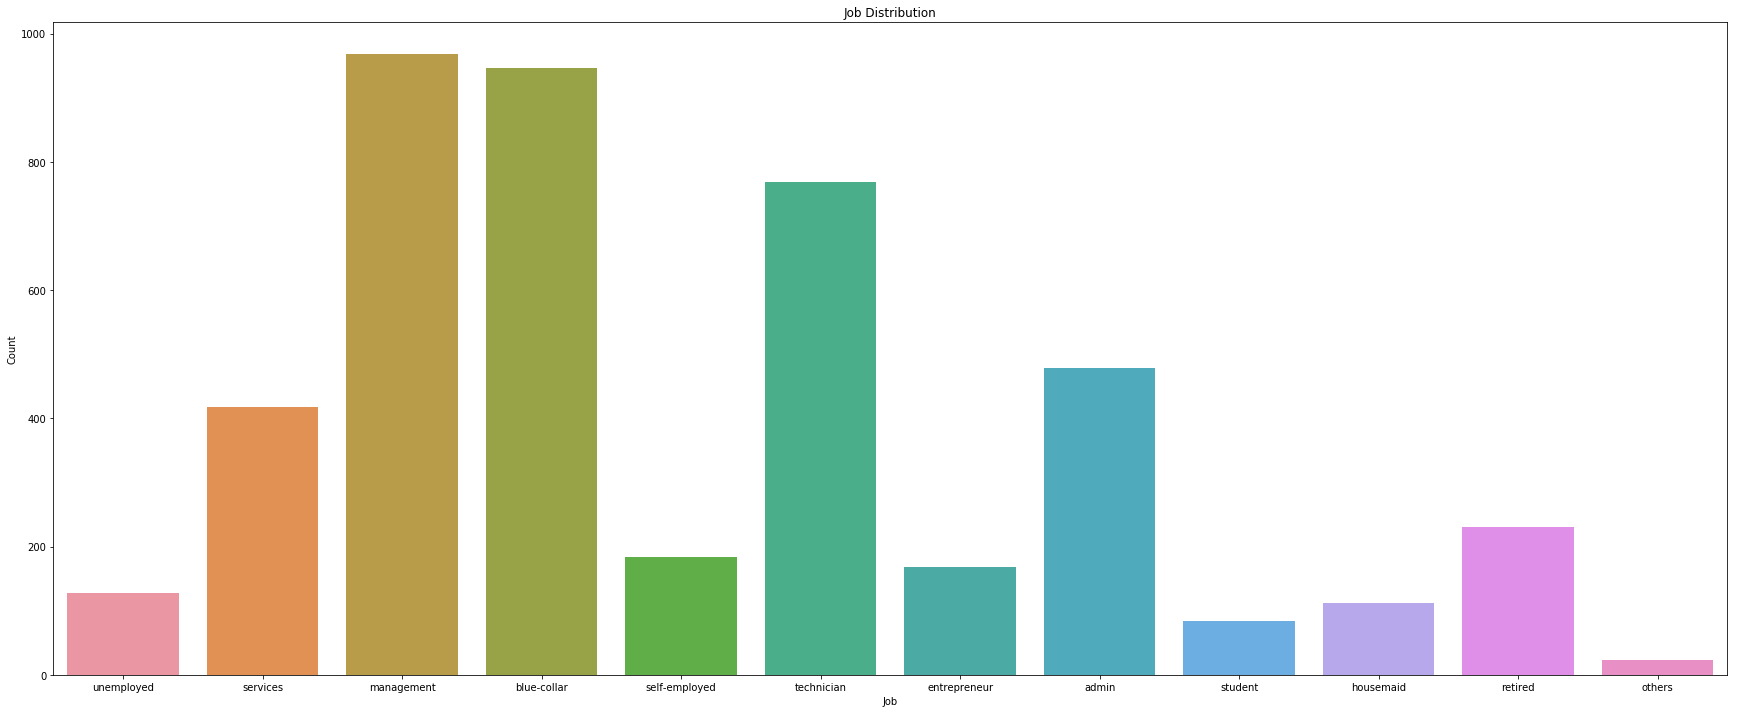

In [13]:
# STATS DESCRIPTION/ GRAPH 2: JOB  
fig, ax = plt.subplots()
fig.set_size_inches(30, 12)
sns.countplot(x = 'job', data = bank)
ax.set_xlabel('Job')
ax.set_ylabel('Count')
ax.set_title('Job Distribution')

In [14]:
# Find the mode of the job 
bank['job'].mode()

0    management
dtype: object

Text(0.5,1,'Marital Distribution')

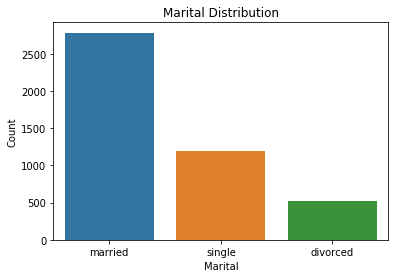

In [15]:
# STATS DESCRIPTION/ GRAPH 3: MARITAL  
fig, ax = plt.subplots()
sns.countplot(x = 'marital', data = bank)
ax.set_xlabel('Marital')
ax.set_ylabel('Count')
ax.set_title('Marital Distribution')

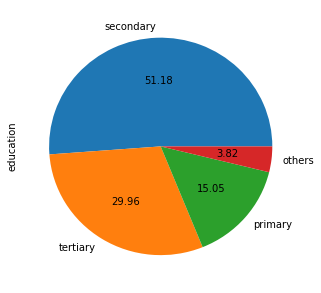

In [16]:
# STATS DESCRIPTION/ GRAPH 4: EDUCATION 
bank['education'].value_counts().plot(kind='pie',autopct='%.2f', figsize=(5,5))  
plt.show()

Text(0.5,1,'Month Distribution')

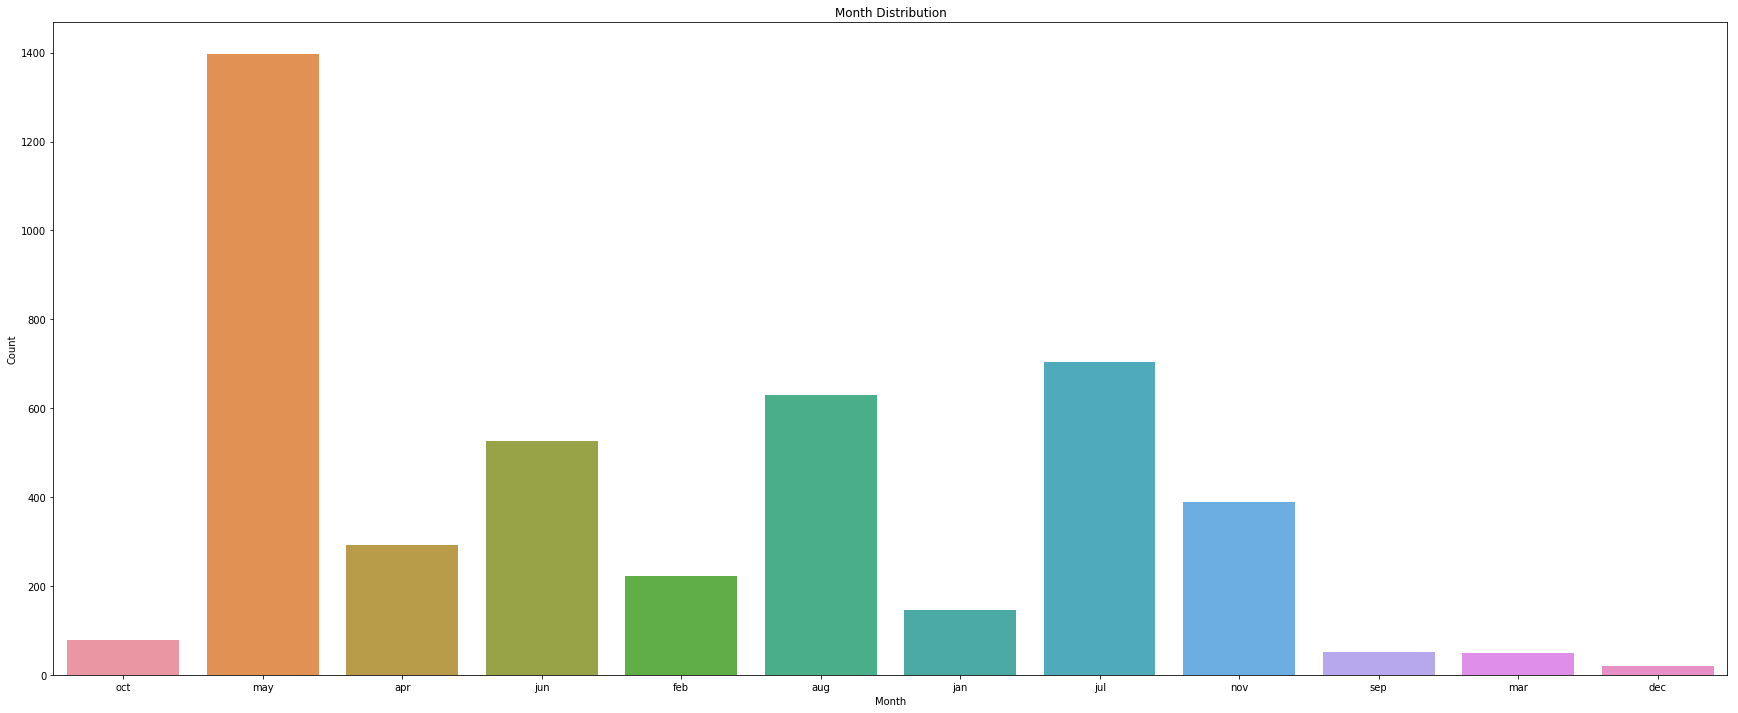

In [17]:
# STATS DESCRIPTION/ GRAPH 5: MONTH 
fig, ax = plt.subplots()
fig.set_size_inches(30, 12)
sns.countplot(x = 'month', data = bank)
ax.set_xlabel('Month')
ax.set_ylabel('Count')
ax.set_title('Month Distribution')

In [18]:
# STATS DESCRIPTION/ GRAPH 6: BALANCE 
bank['balance'].mean()

1421.9056813138038

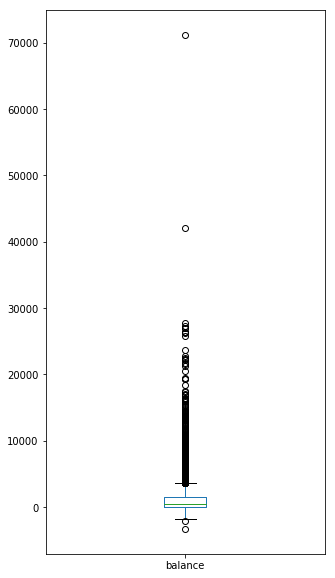

In [19]:
bank['balance'].plot(kind='box',figsize = (5,10))
plt.show()

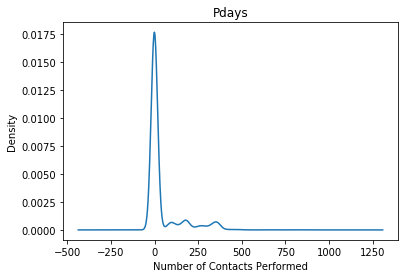

In [20]:
# STATS DESCRIPTION/ GRAPH 7: PDAYS
bank['pdays'].plot(kind='density')
plt.title('Pdays')
plt.xlabel('Number of Contacts Performed')
plt.show()

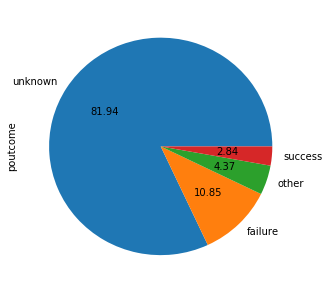

In [21]:
# STATS DESCRIPTION/ GRAPH 8: POUTCOME 
bank['poutcome'].value_counts().plot(kind='pie',autopct='%.2f', figsize=(5, 5))  
plt.show()

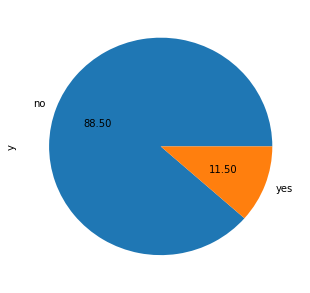

In [22]:
# STATS DESCRIPTION/ GRAPH 9: Y - SUBSCRIPTION OF TERM DEPOSIT  
bank['y'].value_counts().plot(kind='pie',autopct='%.2f', figsize=(5,5))  
plt.show()

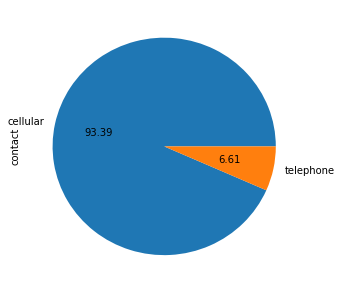

In [23]:
# STATS DESCRIPTION/ GRAPH 10: Contact 
bank['contact'].value_counts().plot(kind='pie',autopct='%.2f', figsize=(5,5))  
plt.show()

In [24]:
# RELATION GRAPH 1 - JOB DISTRIBUTION FOR THE AGE MODE 
bank['age'].mode()
#The mode of age for bank marketing dataset is 34

0    34
dtype: int64

In [25]:
bank_mode = bank.loc[(bank.age == 34) ]

In [26]:
bank_mode['job'].value_counts()

management       64
technician       51
blue-collar      45
admin            31
services         12
entrepreneur     12
self-employed     8
housemaid         3
unemployed        3
student           2
Name: job, dtype: int64

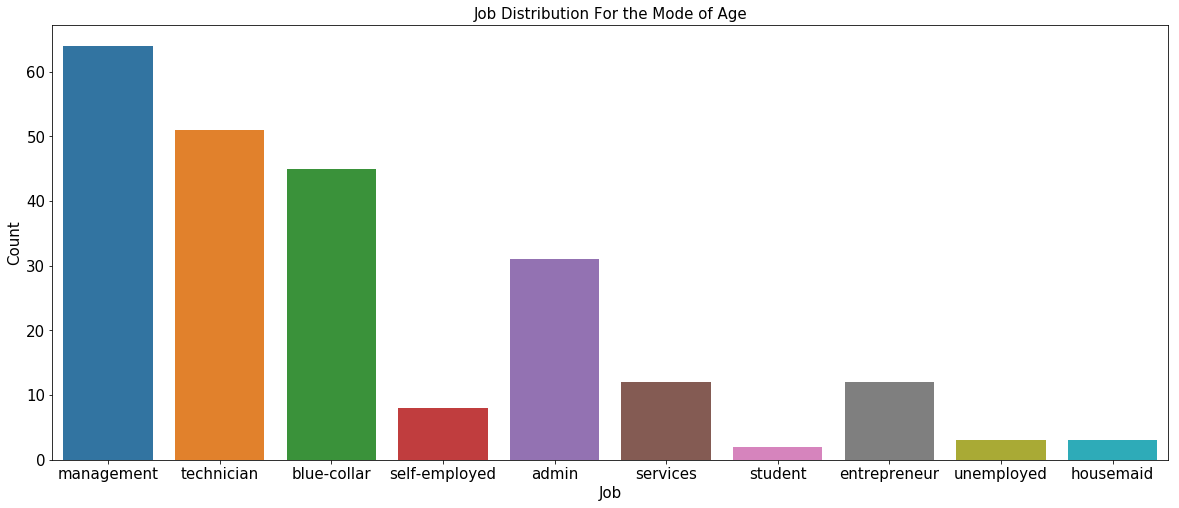

In [27]:
# The graph below shows that the Job Distribution for the mode of age - 34 
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'job', data = bank_mode)
ax.set_xlabel('Job', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Job Distribution For the Mode of Age', fontsize=15)
ax.tick_params(labelsize=15)

In [28]:
# RELATION GRAPH 2 - Existance of Housing Loan vs Marital Status 
bank['marital'].value_counts()

married     2783
single      1195
divorced     528
Name: marital, dtype: int64

In [29]:
bank['housing'].value_counts()

yes    2559
no     1947
Name: housing, dtype: int64

In [30]:
bank_housing = bank.loc[(bank.housing == 'yes') ]

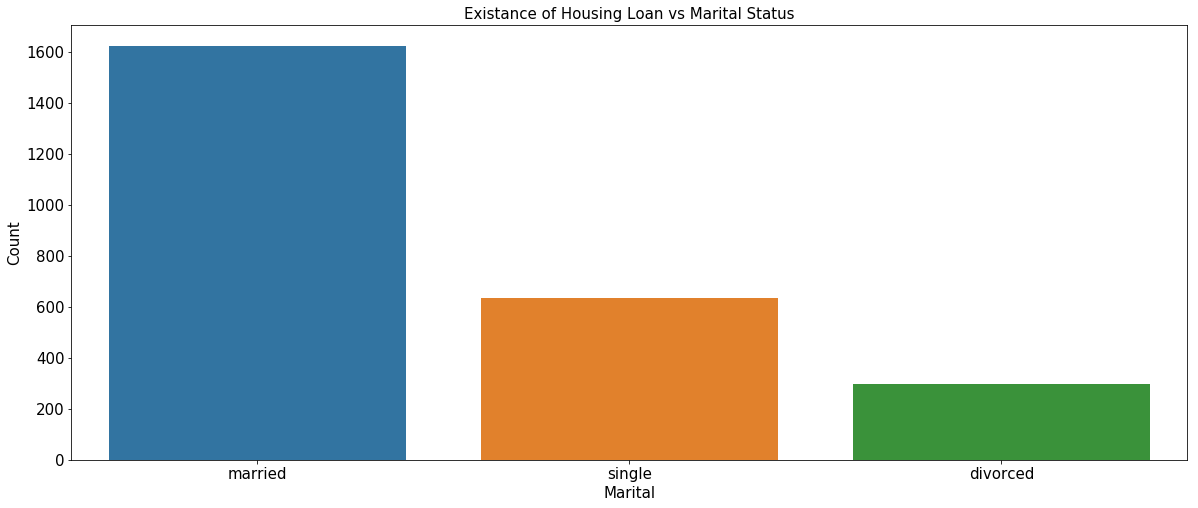

In [31]:
# The graph below shows that the Job Distribution for the mode of age - 34 
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'marital', data = bank_housing)
ax.set_xlabel('Marital', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Existance of Housing Loan vs Marital Status', fontsize=15)
ax.tick_params(labelsize=15)

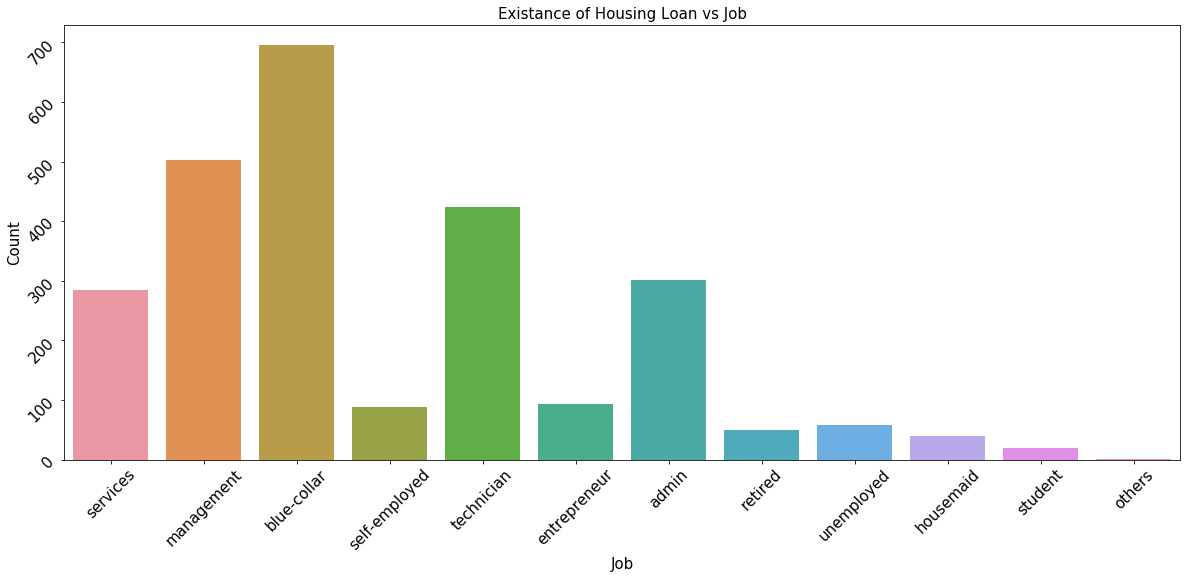

In [32]:
# RELATION GRAPH 3 - Existance of Housing Loan vs Job  
# To find which job is more likely to have housing loan 
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'job', data = bank_housing)
ax.set_xlabel('Job', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Existance of Housing Loan vs Job', fontsize=15)
ax.tick_params(labelsize=15, rotation=45)

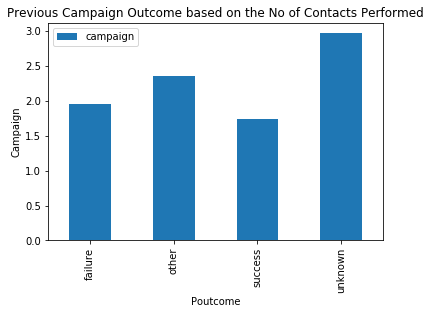

In [33]:
# RELATION GRAPH 4 - Will the campaign influenced the outcome? 
pd.pivot_table(bank,index=['poutcome'], values='campaign').plot(kind='bar')
plt.title("Previous Campaign Outcome based on the No of Contacts Performed")
plt.ylabel('Campaign')
plt.xlabel('Poutcome');

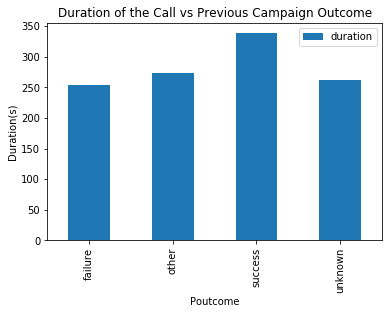

In [34]:
# RELATION GRAPH 5 - Duration of the Call vs Outcome in the Previous Campaign 
pd.pivot_table(bank,index=['poutcome'], values='duration').plot(kind='bar')
plt.title("Duration of the Call vs Previous Campaign Outcome")
plt.ylabel('Duration(s)')
plt.xlabel('Poutcome');

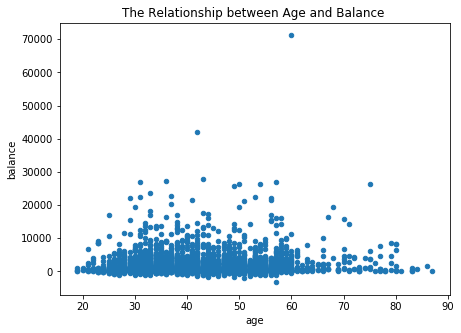

In [35]:
# RELATION GRAPH 6 - Visualisation between age and balance 
scatter_age_balance = bank.plot.scatter('age','balance',figsize = (7,5))
                                                    
plt.title('The Relationship between Age and Balance ')
plt.show()

In [36]:
bank_employ = bank.loc[(bank.job != 'others')]

In [37]:
bank_employ['job'].value_counts()

management       969
blue-collar      946
technician       768
admin            478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
Name: job, dtype: int64

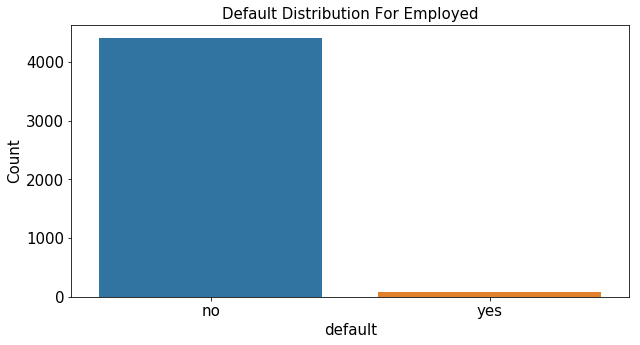

In [38]:
# RELATION GRAPH 7 - Visualisation between Job and Default  
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x = 'default', data = bank_employ)
ax.set_xlabel('default', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Default Distribution For Employed', fontsize=15)
ax.tick_params(labelsize=15)

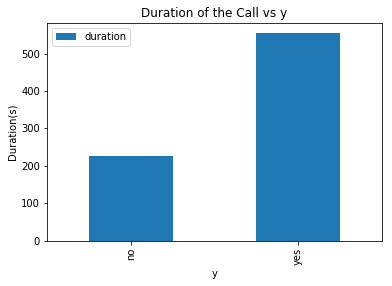

In [39]:
# RELATION GRAPH 8 - Visualisation between Y and Duration
pd.pivot_table(bank,index=['y'], values='duration').plot(kind='bar')
plt.title("Duration of the Call vs y")
plt.ylabel('Duration(s)')
plt.xlabel('y');

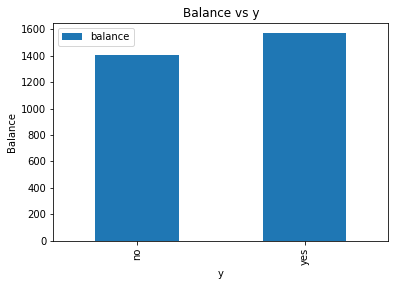

In [40]:
# RELATION GRAPH 9 - Visualisation between Y and Balance
pd.pivot_table(bank,index=['y'], values='balance').plot(kind='bar')
plt.title("Balance vs y")
plt.ylabel('Balance')
plt.xlabel('y');

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


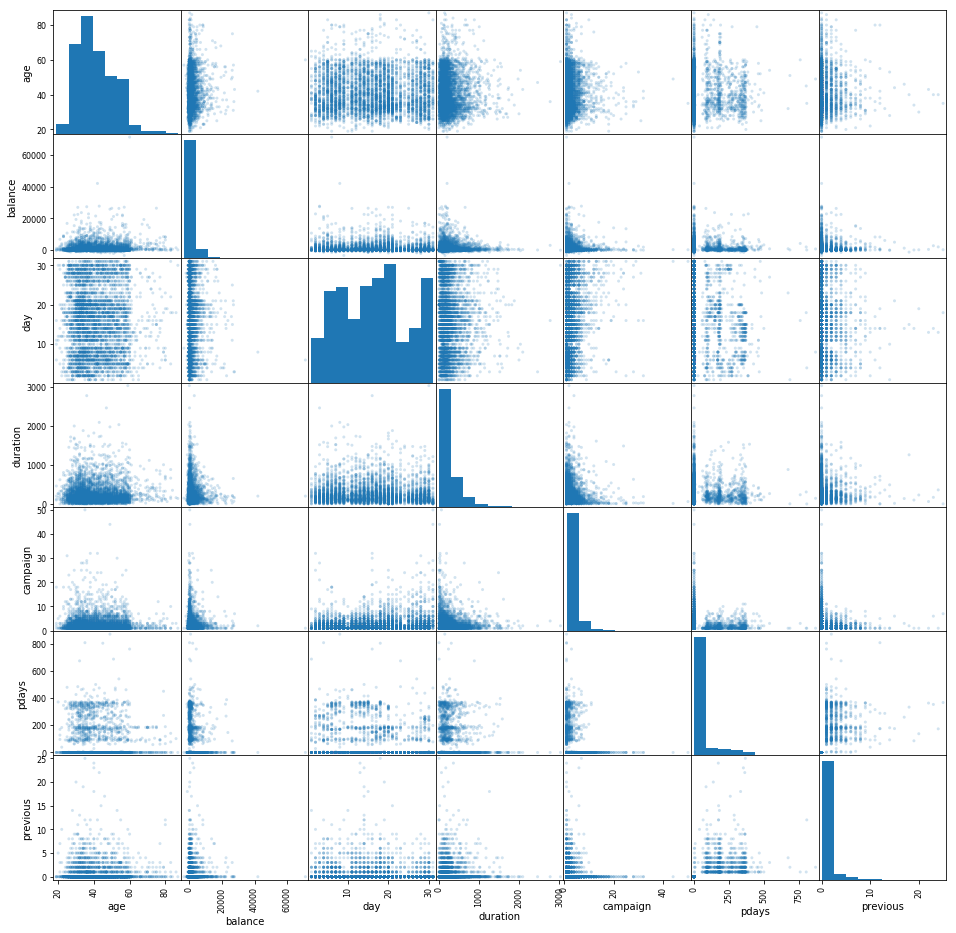

In [41]:
# RELATION GRAPH 10 - Scatter Matrix 
from pandas.tools.plotting import scatter_matrix
scatter_matrix(bank,alpha=0.2,figsize=(16,16),diagonal='hist')
plt.show()

# Task 3: Data Modelling 

In [42]:
# Turning categorical value into dummy variables 
bank['contact'] = bank['contact'].map({'cellular': 1, 'telephone': 2})
bank['poutcome'] = bank['poutcome'].map({'unknown': 0, 'success': 1, 'failure': 2, 'other': 3})
bank['job'] = bank['job'].map({'admin': 1, 'blue-collar': 2, 'entrepreneur': 3, 'housemaid': 4, 'management': 5, 
                               'retired': 6, 'self-employed': 7, 'services': 8, 'student': 9, 'technician': 10, 
                              'unemployed': 11, 'others': 0})
bank['y'] = bank['y'].map({'yes': 1, 'no': 2})

In [43]:
# Creating a new dataset for chosen features 
bank2 = bank[['job', 'contact', 'duration', 'campaign', 'poutcome', 'y']]

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import classification_report

# Defining features and targetted values
array = bank2.values
X = array[:, 0:-1]
Y = array [ :, -1]

In [45]:
# KNN: 80-20 
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=0)
clf = KNeighborsClassifier(50, weights='distance', p=1)
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)   
cm = confusion_matrix(y_test, y_pre)
cur_Score = clf.score(X_test, y_test)
error_rate = 1 - cur_Score
print "Confusion matrix:"
print cm
print"\n"
print "The Error Rate is " + str(round(error_rate,2)) + "\n"
print classification_report(y_test,y_pre)

Confusion matrix:
[[ 17  88]
 [ 22 775]]


The Error Rate is 0.12

              precision    recall  f1-score   support

           1       0.44      0.16      0.24       105
           2       0.90      0.97      0.93       797

   micro avg       0.88      0.88      0.88       902
   macro avg       0.67      0.57      0.58       902
weighted avg       0.84      0.88      0.85       902



In [46]:
# KNN: 60-40
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.4,random_state=0)
clf = KNeighborsClassifier(50, weights='distance', p=1)
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)   
cm = confusion_matrix(y_test, y_pre)
cur_Score = clf.score(X_test, y_test)
error_rate = 1 - cur_Score
print "Confusion matrix:"
print cm
print"\n"
print "The Error Rate is " + str(round(error_rate,2)) + "\n"
print classification_report(y_test,y_pre)

Confusion matrix:
[[  36  176]
 [  47 1544]]


The Error Rate is 0.12

              precision    recall  f1-score   support

           1       0.43      0.17      0.24       212
           2       0.90      0.97      0.93      1591

   micro avg       0.88      0.88      0.88      1803
   macro avg       0.67      0.57      0.59      1803
weighted avg       0.84      0.88      0.85      1803



In [47]:
# KNN: 50-50 
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.5,random_state=0)
clf = KNeighborsClassifier(50, weights='distance', p=1)
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)   
cm = confusion_matrix(y_test, y_pre)
cur_Score = clf.score(X_test, y_test)
error_rate = 1 - cur_Score
print "Confusion matrix:"
print cm
print"\n"
print "The Error Rate is " + str(round(error_rate,2)) + "\n"
print classification_report(y_test,y_pre)

Confusion matrix:
[[  48  219]
 [  53 1933]]


The Error Rate is 0.12

              precision    recall  f1-score   support

           1       0.48      0.18      0.26       267
           2       0.90      0.97      0.93      1986

   micro avg       0.88      0.88      0.88      2253
   macro avg       0.69      0.58      0.60      2253
weighted avg       0.85      0.88      0.85      2253



In [48]:
# Decision tree: 80-20
from sklearn.tree import DecisionTreeClassifier  
from sklearn import tree
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=0)
clf = DecisionTreeClassifier()
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)
cm = confusion_matrix(y_test, y_pre)
cur_Score = clf.score(X_test, y_test)
error_rate = 1 - cur_Score
print "Confusion matrix:"
print cm
print"\n"
print "The Error Rate is " + str(round(error_rate,2)) + "\n"
print classification_report(y_test,y_pre)

Confusion matrix:
[[ 35  70]
 [ 68 729]]


The Error Rate is 0.15

              precision    recall  f1-score   support

           1       0.34      0.33      0.34       105
           2       0.91      0.91      0.91       797

   micro avg       0.85      0.85      0.85       902
   macro avg       0.63      0.62      0.63       902
weighted avg       0.85      0.85      0.85       902



In [49]:
# Decision tree: 60-40 
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.4,random_state=0)
clf = DecisionTreeClassifier()
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)
cm = confusion_matrix(y_test, y_pre)
cur_Score = clf.score(X_test, y_test)
error_rate = 1 - cur_Score
print "Confusion matrix:"
print cm
print"\n"
print "The Error Rate is " + str(round(error_rate,2)) + "\n"
print classification_report(y_test,y_pre)

Confusion matrix:
[[  73  139]
 [ 140 1451]]


The Error Rate is 0.15

              precision    recall  f1-score   support

           1       0.34      0.34      0.34       212
           2       0.91      0.91      0.91      1591

   micro avg       0.85      0.85      0.85      1803
   macro avg       0.63      0.63      0.63      1803
weighted avg       0.85      0.85      0.85      1803



In [50]:
# Decision tree: 50-50 
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.5,random_state=0)
clf = DecisionTreeClassifier()
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)
cm = confusion_matrix(y_test, y_pre)
cur_Score = clf.score(X_test, y_test)
error_rate = 1 - cur_Score
print "Confusion matrix:"
print cm
print"\n"
print "The Error Rate is " + str(round(error_rate,2)) + "\n"
print classification_report(y_test,y_pre)

Confusion matrix:
[[ 107  160]
 [ 172 1814]]


The Error Rate is 0.15

              precision    recall  f1-score   support

           1       0.38      0.40      0.39       267
           2       0.92      0.91      0.92      1986

   micro avg       0.85      0.85      0.85      2253
   macro avg       0.65      0.66      0.65      2253
weighted avg       0.86      0.85      0.85      2253

